<a href="https://colab.research.google.com/github/MadmanMarble/MadmanMarble/blob/main/buildVRT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from osgeo import gdal
import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 38.2 MB/s eta 0:00:00


In [6]:
import os
import shutil
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.utils import normalize
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
import rasterio
from sklearn.model_selection import train_test_split
import shutil
import rasterio
from rasterio.plot import show
from sklearn.model_selection import train_test_split
import random

build using chatgpt

In [17]:
planet_2018 = sorted(glob.glob(f"/content/drive/MyDrive/DeepLearning_Project/Datasets/planet/2018_select/*.tif"))
planet_2019 = sorted(glob.glob(f"/content/drive/MyDrive/DeepLearning_Project/Datasets/planet/2019_select/*.tif"))
planet_2020 = sorted(glob.glob(f"/content/drive/MyDrive/DeepLearning_Project/Datasets/planet/2020_select/*.tif"))

In [118]:
planet_2018_hawaii = sorted(glob.glob(f"/content/drive/MyDrive/DeepLearning_Project/Datasets/planet/2018_select_hawaii/*.tif"))
planet_2019_hawaii = sorted(glob.glob(f"/content/drive/MyDrive/DeepLearning_Project/Datasets/planet/2019_select_hawaii/*.tif"))
planet_2020_hawaii = sorted(glob.glob(f"/content/drive/MyDrive/DeepLearning_Project/Datasets/planet/2020_select_hawaii/*.tif"))

/content/drive/MyDrive/DeepLearning_Project/Datasets/planet/2018_select_hawaii/waipio_2018-01-09.tif
/content/drive/MyDrive/DeepLearning_Project/Datasets/planet/2019_select_hawaii/waipio_2019-02-18.tif


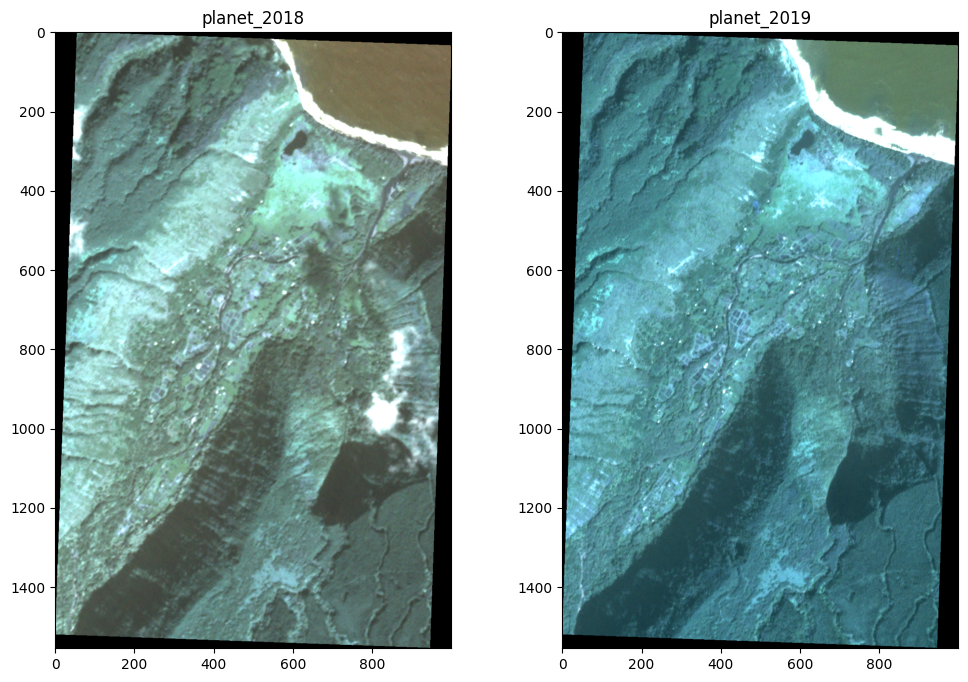

/content/drive/MyDrive/DeepLearning_Project/Datasets/planet/2018_select_hawaii/waipio_2018-01-09.tif
/content/drive/MyDrive/DeepLearning_Project/Datasets/planet/2020_select_hawaii/waipio_2020-03-02.tif


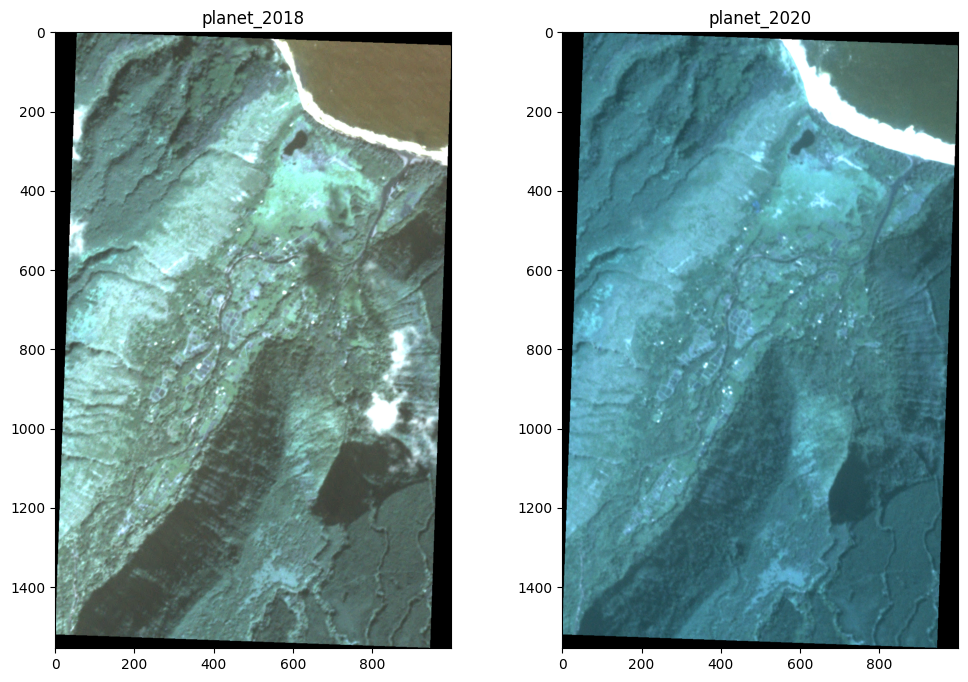

In [122]:
# img_num = random.randint(0, len(planet_2018)) # train_img_dir
img_num = 3

img_for_plot = rasterio.open(planet_2018_hawaii[img_num]) # train_img_dir
img_for_plot = img_for_plot.read()
img_for_plot = img_for_plot[:3, :, :].transpose(1, 2, 0)
p2, p98 = np.percentile(img_for_plot, (2, 98))
img_for_plot_clipped = np.clip(img_for_plot, p2, p98)
img_for_plot_norm = (img_for_plot_clipped - p2) / (p98 - p2)

img_for_plot2 = rasterio.open(planet_2019_hawaii[img_num]) # train_img_dir
img_for_plot2 = img_for_plot2.read()
img_for_plot2 = img_for_plot2[:3, :, :].transpose(1, 2, 0)
p2, p98 = np.percentile(img_for_plot2, (2, 98))
img_for_plot_clipped2 = np.clip(img_for_plot2, p2, p98)
img_for_plot_norm2 = (img_for_plot_clipped2 - p2) / (p98 - p2)

print(planet_2018_hawaii[img_num])
print(planet_2019_hawaii[img_num])

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(img_for_plot_norm)
plt.title('planet_2018')
plt.subplot(122)
plt.imshow(img_for_plot_norm2) # , cmap='gray'
plt.title('planet_2019')
plt.show()



img_for_plot = rasterio.open(planet_2018_hawaii[img_num]) # train_img_dir
img_for_plot = img_for_plot.read()
img_for_plot = img_for_plot[:3, :, :].transpose(1, 2, 0)
p2, p98 = np.percentile(img_for_plot, (2, 98))
img_for_plot_clipped = np.clip(img_for_plot, p2, p98)
img_for_plot_norm = (img_for_plot_clipped - p2) / (p98 - p2)


img_for_plot2 = rasterio.open(planet_2020_hawaii[img_num]) # train_img_dir
img_for_plot2 = img_for_plot2.read()
img_for_plot2 = img_for_plot2[:3, :, :].transpose(1, 2, 0)
p2, p98 = np.percentile(img_for_plot2, (2, 98))
img_for_plot_clipped2 = np.clip(img_for_plot2, p2, p98)
img_for_plot_norm2 = (img_for_plot_clipped2 - p2) / (p98 - p2)

print(planet_2018_hawaii[img_num])
print(planet_2020_hawaii[img_num])

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(img_for_plot_norm)
plt.title('planet_2018')
plt.subplot(122)
plt.imshow(img_for_plot_norm2) # , cmap='gray'
plt.title('planet_2020')
plt.show()

In [69]:
planet_replace = sorted(glob.glob(f"/content/drive/MyDrive/DeepLearning_Project/Datasets/individual_planet_2018/hanalei_2018-02-12.tif"))
# planet_2019_replace = sorted(glob.glob(f"/content/drive/MyDrive/DeepLearning_Project/Datasets/planet/2019_select/*.tif"))
# planet_2020_replace = sorted(glob.glob(f"/content/drive/MyDrive/DeepLearning_Project/Datasets/planet/2020_select/*.tif"))

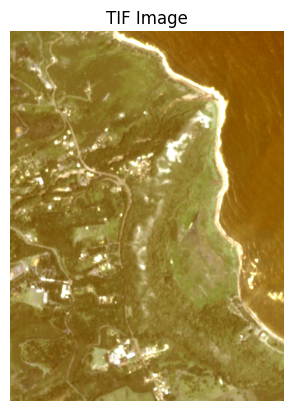

In [112]:

tif_file_path = "/content/drive/MyDrive/DeepLearning_Project/Datasets/individual_planet_2018/waihee_2018-09-02.tif"
with rasterio.open(tif_file_path) as src:
    img = src.read()
    if img.shape[0] > 1:
        img = img[:3, :, :]
    img = img.transpose((1, 2, 0))

    # img = img / img.max()
    p2, p98 = np.percentile(img, (2, 98))
    img_clipped = np.clip(img, p2, p98)
    img = (img_clipped - p2) / (p98 - p2)

# Display the image
plt.imshow(img)
plt.title('TIF Image')
plt.axis('off')  # Turn off the axis
plt.show()


In [80]:
img_num = random.randint(0, len(planet_replace))
img_num = (planet_replace[img_num].split('/')[-1]).split('.')[0]
print(img_num)
img_for_plot = rasterio.open(planet_replace[img_num])
img_for_plot = img_for_plot[:3, :, :].transpose(1, 2, 0)
# img_for_plot_norm = img_for_plot /np.max(img_for_plot)
p2, p98 = np.percentile(img_for_plot, (2, 98))
img_for_plot_clipped = np.clip(img_for_plot, p2, p98)
img_for_plot_norm = (img_for_plot_clipped - p2) / (p98 - p2)
# img_for_plot2 = rasterio.open(planet_2020[img_num]) # train_img_dir
# img_for_plot2 = img_for_plot2.read()
# img_for_plot2 = img_for_plot2[:3, :, :].transpose(1, 2, 0)
# img_for_plot_norm2 = img_for_plot2 /np.max(img_for_plot2)



# label_for_plot = rasterio.open(planet_2020[img_num]) # train_label_dir
# label_for_plot = label_for_plot.read(1)
# labels, count = np.unique(label_for_plot, return_counts=True)
# print("Labels are: ", labels, "and the counts are:", count)
print(planet_replace[img_num])
print(planet_2020[img_num])

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(img_for_plot_norm)
plt.title('2018 replacement Image')
plt.subplot(122)
plt.imshow(img_for_plot_norm2) # , cmap='gray'
plt.title('2020 Image')
plt.show()

hanalei_2018-02-12


TypeError: list indices must be integers or slices, not str

In [123]:
# listf('/content/drive/MyDrive/DeepLearning_Project/Datasets/planet_2018_stack/',pattern = '*.tif')
import os
dir_path = '/content/drive/MyDrive/DeepLearning_Project/Datasets/planet/2018_select/'
[dir_path+f for f in os.listdir(dir_path) if f.endswith('.tif')]

['/content/drive/MyDrive/DeepLearning_Project/Datasets/planet/2018_select/kahuku_2018-02-19.tif',
 '/content/drive/MyDrive/DeepLearning_Project/Datasets/planet/2018_select/haleiwa_2018-01-12.tif',
 '/content/drive/MyDrive/DeepLearning_Project/Datasets/planet/2018_select/hanalei_2018-01-12.tif',
 '/content/drive/MyDrive/DeepLearning_Project/Datasets/planet/2018_select/huleia_2018-01-14.tif',
 '/content/drive/MyDrive/DeepLearning_Project/Datasets/planet/2018_select/kakahaia_2018-02-11.tif',
 '/content/drive/MyDrive/DeepLearning_Project/Datasets/planet/2018_select/kaluaapuhi_2018-01-04.tif',
 '/content/drive/MyDrive/DeepLearning_Project/Datasets/planet/2018_select/kamalo_2018-01-09.tif',
 '/content/drive/MyDrive/DeepLearning_Project/Datasets/planet/2018_select/kanaha_2018-01-09.tif',
 '/content/drive/MyDrive/DeepLearning_Project/Datasets/planet/2018_select/kawainui_2018-01-26.tif',
 '/content/drive/MyDrive/DeepLearning_Project/Datasets/planet/2018_select/kealia_2018-01-13.tif',
 '/content

In [127]:
# List of your multi-band TIFF files


dir_path = '/content/drive/MyDrive/DeepLearning_Project/Datasets/planet/2020_select/'
[dir_path+f for f in os.listdir(dir_path) if f.endswith('.tif')]


tiff_files = [
    dir_path+f for f in os.listdir(dir_path) if f.endswith('.tif')
]

# Path to the output VRT file
output_vrt = '/content/drive/MyDrive/DeepLearning_Project/Datasets/planet/2020_select/2020_vrt_march27_update.vrt'

# Create VRT
vrt_options = gdal.BuildVRTOptions(separate=False)  # Use separate=True for multi-band handling
vrt = gdal.BuildVRT(output_vrt, tiff_files, options=vrt_options)
vrt = None  # Close the VRT to flush to disk

end

In [ ]:
# !unzip /content/drive/MyDrive/DeepLearning_Project/Datasets/naip_2021/HI_2021_NAIP_4islands.zip -d /content/drive/MyDrive/DeepLearning_Project/Datasets/naip_2021/

In [ ]:
# Directory containing your .tif files
tif_directory = "/content/drive/MyDrive/DeepLearning_Project/Datasets/planet_hawaii_2020_stack"

# List all .tif files
tif_files = [os.path.join(tif_directory, f) for f in os.listdir(tif_directory) if f.endswith('.tif')]

# Function to get CRS and resolution
def get_crs_and_resolution(file_path):
    dataset = gdal.Open(file_path)
    crs = dataset.GetProjection()
    geotransform = dataset.GetGeoTransform()
    resolution = (geotransform[1], geotransform[5])  # Pixel width and height
    return crs, resolution

# Check CRS and resolution for each file
for file in tif_files:
    crs, resolution = get_crs_and_resolution(file)
    print(f"{file}: CRS={crs}, Resolution={resolution}")


In [ ]:
pip install GDAL


In [ ]:
# Specify the directory containing your .tif files
tif_directory = "/content/drive/MyDrive/DeepLearning_Project/Datasets/planet_2018_stack"

# Specify the output VRT file path
output_vrt_path = os.path.join(tif_directory, "planet_2018_stack_index.vrt")

# List all .tif files in the directory
tif_files = [os.path.join(tif_directory, f) for f in os.listdir(tif_directory) if f.endswith('.tif')]

print(f"Number of files detected: {len(tif_files)}")
for file in tif_files:
    print(file)

# Use GDAL's buildVRT function to create a VRT from the list of tif files
vrt = gdal.BuildVRT(output_vrt_path, tif_files)

# Save and close the VRT
vrt.FlushCache()
vrt = None

print(f"VRT created successfully: {output_vrt_path}")

In [ ]:
# try merging?



end

In [ ]:
#Create VRT, write to disk
path_vrt = gdal.BuildVRT('/content/drive/MyDrive/DeepLearning_Project/Datasets/naip_2021/content/HI_2021_NAIP/naip_index.vrt',
                         glob.glob('/content/drive/MyDrive/DeepLearning_Project/Datasets/naip_2021/content/HI_2021_NAIP/*.tif'))#,options =gdal.BuildVRTOptions(bandList= [1,2,3]))
path_vrt.FlushCache()

# output_raster = gdal.Translate('/content/mosaic.tif',
#                                 '/content/output/gtiff_index.vrt',
#                                 outputSRS='EPSG:3857')
# output_raster.FlushCache()

In [ ]:
path_vrt = gdal.BuildVRT('/content/drive/MyDrive/DeepLearning_Project/Datasets/planet_2018_stack/index_planet_2018.vrt',
                         glob.glob('/content/drive/MyDrive/DeepLearning_Project/Datasets/planet_2018_stack/*.tif'))#,options =gdal.BuildVRTOptions(bandList= [1,2,3]))
path_vrt.FlushCache()

In [ ]:
source = '/content/drive/MyDrive/DeepLearning_Project/Datasets/planet'
destination = '/content/drive/MyDrive/DeepLearning_Project/Datasets/planet_2018'

# Ensure the destination directory exists
if not os.path.exists(destination):
    os.makedirs(destination)

# Loop through all files in the source directory
for filename in os.listdir(source):
    if filename.('.tif'):


